# Progressive Resizing

In [1]:
from fastai import *
from fastai.vision import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pwd 

/kaggle/working


In [3]:
!ls ../

input  lib  working


In [4]:
!ls ../input/intel-image-classification

seg_pred  seg_test  seg_train


In [5]:
!ls ../input/intel-image-classification/seg_train/seg_train

buildings  forest  glacier  mountain  sea  street


In [6]:
!ls ../input/intel-image-classification/seg_train/seg_train | wc -l  #number of classes in the train set

6


In [7]:
!ls ../input/intel-image-classification/seg_pred/seg_pred | wc -l # number of images in the test set

7301


In [8]:
os.listdir('../input/intel-image-classification/seg_pred/seg_pred')

['11242.jpg',
 '19021.jpg',
 '3776.jpg',
 '15779.jpg',
 '20803.jpg',
 '22146.jpg',
 '4991.jpg',
 '16178.jpg',
 '6882.jpg',
 '17428.jpg',
 '4853.jpg',
 '10226.jpg',
 '12648.jpg',
 '10768.jpg',
 '5903.jpg',
 '6531.jpg',
 '7737.jpg',
 '5031.jpg',
 '7765.jpg',
 '5000.jpg',
 '4714.jpg',
 '16558.jpg',
 '13102.jpg',
 '21803.jpg',
 '19315.jpg',
 '15315.jpg',
 '5991.jpg',
 '22449.jpg',
 '11958.jpg',
 '5303.jpg',
 '11245.jpg',
 '15116.jpg',
 '6497.jpg',
 '4866.jpg',
 '12215.jpg',
 '10179.jpg',
 '17988.jpg',
 '23513.jpg',
 '10212.jpg',
 '15302.jpg',
 '23288.jpg',
 '5403.jpg',
 '22932.jpg',
 '458.jpg',
 '16040.jpg',
 '22638.jpg',
 '12253.jpg',
 '7312.jpg',
 '8317.jpg',
 '11885.jpg',
 '10424.jpg',
 '21403.jpg',
 '12828.jpg',
 '8944.jpg',
 '20547.jpg',
 '4394.jpg',
 '23214.jpg',
 '23701.jpg',
 '16271.jpg',
 '23480.jpg',
 '20830.jpg',
 '1885.jpg',
 '13224.jpg',
 '20471.jpg',
 '8969.jpg',
 '2784.jpg',
 '13358.jpg',
 '17377.jpg',
 '11330.jpg',
 '5756.jpg',
 '13331.jpg',
 '13461.jpg',
 '13727.jpg',
 '88

In [9]:
path = Path('../input/') #parent path


#low res data
data_64 = (
    ImageList.from_folder(path/'intel-image-classification/seg_train')
    .split_by_rand_pct(0.1,seed=33)
    .label_from_folder()
    .add_test_folder('../seg_pred')
    .transform(get_transforms(),size=64)
    .databunch(bs=256)
    .normalize(imagenet_stats)
)

data_256 = (
    ImageList.from_folder(path/'intel-image-classification/seg_train')
    .split_by_rand_pct(0.1,seed=33)
    .label_from_folder()
    .add_test_folder('../seg_pred')
    .transform(get_transforms(),size=256)
    .databunch(bs=64)
    .normalize(imagenet_stats)
)

In [10]:
data_64.classes,data_64.c

(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'], 6)

In [11]:
len(data_64.test_ds),len(data_64.train_ds),len(data_64.valid_ds)

(7301, 12631, 1403)

In [12]:
data_64

ImageDataBunch;

Train: LabelList (12631 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
buildings,buildings,buildings,buildings,buildings
Path: ../input/intel-image-classification/seg_train;

Valid: LabelList (1403 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
glacier,street,mountain,sea,forest
Path: ../input/intel-image-classification/seg_train;

Test: LabelList (7301 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: EmptyLabelList
,,,,
Path: ../input/intel-image-classification/seg_train

# Transfer Learning

In [13]:
learn = cnn_learner(
    data_64,
    models.resnet50,
    metrics=[accuracy],
    model_dir='/tmp/model/'
)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.20E-03
Min loss divided by 10: 1.20E-02


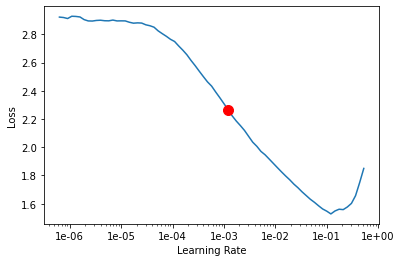

In [15]:
learn.lr_find() #finds the change in loss with respect to the learning rate
learn.recorder.plot(suggestion=True)#plots that change

In [16]:
learn.fit_one_cycle(1, 1.20E-03)

epoch,train_loss,valid_loss,accuracy,time
0,1.012605,0.598708,0.823949,00:54


# Unfreezing and Resizing

In [17]:
learn.data = data_256
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-06
Min loss divided by 10: 2.75E-05


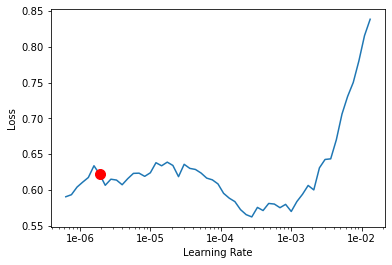

In [18]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(1,slice(1e-4,1e-3))